In [49]:
import numpy as np
import scipy.stats
import pandas as pd
import re
import mailbox
import csv
import datetime

import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
address = '/Users/helenkapatsa/Repositories/big-data-pandas/Входящие.mbox'
mbox = mailbox.mbox(address)

# Отобразим количество писем
mbox.__len__()

763

In [4]:
# Отобразим отправителя первого письма
mbox[0]['From']

'lazareva marina <beautka@yandex.ru>'

In [5]:
# Используем функцию search и регулярное выражение для вычленения почты
re.search('<(.+)>',mbox[0]['From'])

<re.Match object; span=(16, 35), match='<beautka@yandex.ru>'>

In [6]:
# Найти в столбце From строки объекта mbox строку, удовлетворяющую выражению "знак меньше – любой символ"
re.search('<(.+)>',mbox[0]['From']).group(0)

'<beautka@yandex.ru>'

In [7]:
# Создадим парсер, очищающий от лишних символов. Кавычки – это оформление вывода JN
def clean_address(raw):
    match = re.search('<(.+)>', raw)
    
    if match:
        return match.group(1)
    else:
        return raw
    
clean_address(mbox[0]['From'])

'beautka@yandex.ru'

In [72]:
# Приведем к часовому поясу UTC +3:00
time = pd.to_datetime(mbox[i]['Date']).tz_convert('Etc/GMT+3')
time

Timestamp('2014-06-14 08:14:44-0300', tz='Etc/GMT+3')

In [89]:
# mbox[0]['timeofday'] = time.hour
# time.hour
times=[]
for i in range(mbox.__len__()): 
    time = pd.to_datetime(mbox[i]['Date']).tz_convert('Etc/GMT+3')
    times.append(time.hour)
    
times

[7,
 7,
 9,
 4,
 10,
 23,
 11,
 10,
 8,
 11,
 10,
 10,
 8,
 13,
 13,
 14,
 12,
 7,
 5,
 6,
 5,
 4,
 3,
 13,
 19,
 16,
 8,
 8,
 13,
 7,
 7,
 4,
 16,
 10,
 8,
 18,
 14,
 11,
 15,
 11,
 11,
 16,
 12,
 14,
 14,
 13,
 14,
 11,
 14,
 14,
 11,
 9,
 7,
 5,
 8,
 8,
 14,
 8,
 4,
 9,
 4,
 11,
 3,
 13,
 7,
 3,
 6,
 17,
 17,
 17,
 9,
 9,
 8,
 8,
 5,
 5,
 13,
 17,
 14,
 23,
 7,
 6,
 16,
 6,
 4,
 15,
 15,
 6,
 17,
 8,
 7,
 10,
 5,
 15,
 12,
 15,
 6,
 10,
 17,
 10,
 6,
 5,
 5,
 16,
 14,
 12,
 12,
 13,
 7,
 7,
 11,
 10,
 3,
 17,
 16,
 16,
 15,
 4,
 3,
 17,
 14,
 12,
 10,
 10,
 10,
 8,
 17,
 15,
 15,
 15,
 15,
 15,
 13,
 7,
 3,
 18,
 16,
 12,
 2,
 14,
 8,
 9,
 10,
 13,
 6,
 8,
 16,
 7,
 3,
 13,
 10,
 11,
 17,
 2,
 8,
 16,
 5,
 8,
 15,
 18,
 7,
 3,
 15,
 4,
 13,
 3,
 4,
 4,
 5,
 2,
 16,
 9,
 4,
 6,
 2,
 16,
 7,
 12,
 16,
 13,
 10,
 9,
 8,
 21,
 4,
 7,
 9,
 9,
 10,
 12,
 16,
 9,
 3,
 2,
 9,
 15,
 3,
 11,
 7,
 7,
 12,
 9,
 14,
 3,
 17,
 14,
 3,
 2,
 14,
 4,
 17,
 14,
 17,
 7,
 9,
 8,
 8,
 3,
 17,
 12,
 5,


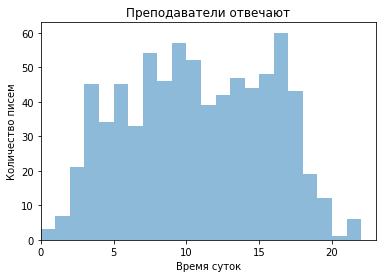

In [90]:
# Обозначим, что будет использовать plotly
data = times

bins = np.arange(-100, 100)

# Зададим края шкал – от 0 до 23 часов включительно
plt.xlim([min(data), max(data)])

# Запросим построение гистограммы
plt.hist(data, bins=bins, alpha=0.5)

# Добавим надписи – название графика и шкал
plt.title('Преподаватели отвечают')
plt.xlabel('Время суток')
plt.ylabel('Количество писем')

plt.show()